In [131]:
#load the dataset
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

df = california_housing.frame

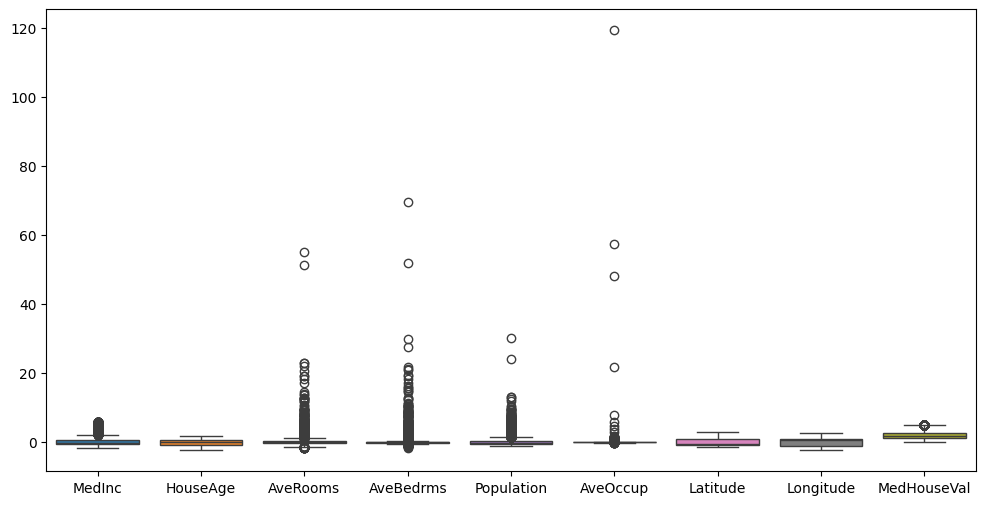

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Reduced dataset shape: (19794, 5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,dimensionality_reduced
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,4.526,"[0.9177540393716024, 3.892768097162335, -0.620..."
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,3.585,"[0.8142287828221676, 2.9031494295976428, 1.394..."
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,3.521,"[1.2540984001561775, 2.9466988116251116, -1.28..."
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,3.413,"[1.3930025880753127, 2.229409746628334, -1.594..."
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,3.422,"[1.5223949221090505, 1.7655454772098667, -1.75..."
...,...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781,"[2.1745137697006522, -1.2437487505337612, 0.29..."
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771,"[2.1419993345175756, -0.9051475051628375, 0.86..."
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923,"[2.0979025565384894, -1.1164543346883933, 0.91..."
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847,"[2.162332500915638, -1.0940431872856633, 0.815..."


In [132]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


# Step 1: Data standardization
scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df.drop('MedHouseVal', axis=1)), columns=df.columns[:-1])
df_standard['MedHouseVal'] = df['MedHouseVal'] # Add the target column back without scaling
df_standard

# Step 2: Look for outliers using 2D visualization (for a couple of features)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_standard)
plt.show()

# Step 3: Look for outliers using 3D visualization (for three features)
import plotly.express as px

fig = px.scatter_3d(
    df_standard,
    x='MedInc',
    y='AveRooms',
    z='Population',
    color='MedHouseVal'
)

fig.show()

# Step 4: Remove outliers
# We will use Z-score to identify and remove outliers
from scipy import stats
df_clean = df_standard[(np.abs(stats.zscore(df_standard)) < 3).all(axis=1)]

df_clean

# Step 5: Check for missing values
missing_values = df_clean.isnull().sum()
# Print the missing values (if any)
print(missing_values)

# Step 6: Handle missing values (if any)
# For this dataset, there are no missing values usually, but if there were, you could handle them like this:
df_clean = df_clean.fillna(df_clean.mean()) # to replace with mean
df_clean.dropna(inplace=True) # to remove rows with missing values

# Step 7: Check for any categorical values
# This dataset does not contain categorical features

# Step 8: Perform dimensionality reduction
# Keep 95% of variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_clean)
print("Reduced dataset shape:", df_reduced.shape)
pca.explained_variance_ratio_

df_clean['dimensionality_reduced'] = list(df_reduced)

df_clean

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [140]:
# Select relevant features for clustering
features_to_scale = df_clean[['Population', 'MedHouseVal']]
# Standardize the selected data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(features_to_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

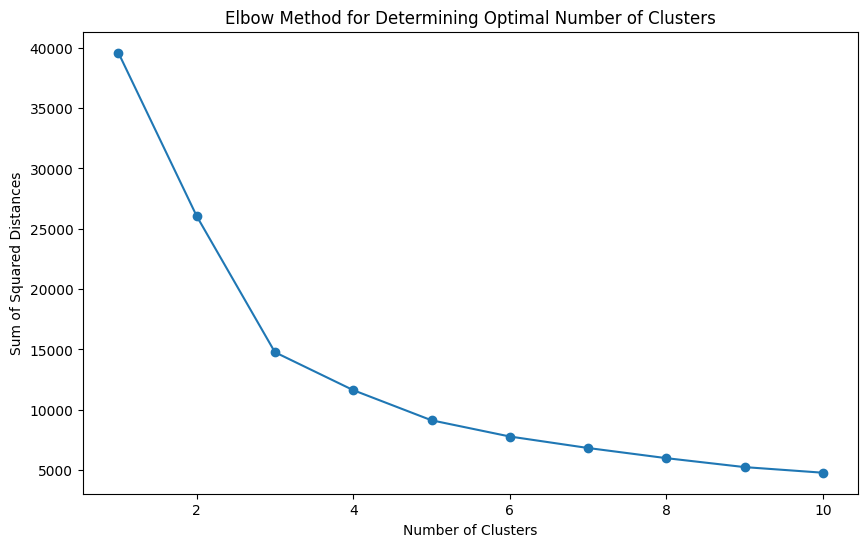

In [141]:
# Determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE values for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [142]:
# Assuming the elbow is found at 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



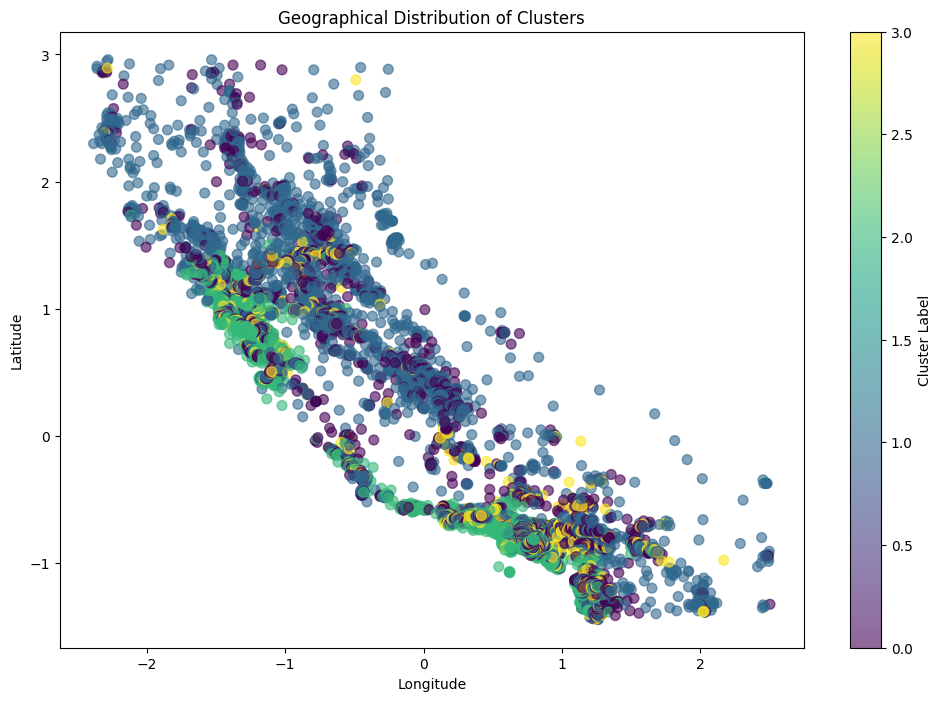

In [143]:
# Add the cluster information to the original DataFrame
df_clean['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(12, 8))
plt.scatter(df_clean['Longitude'], df_clean['Latitude'], c=df_clean['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Geographical Distribution of Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.56


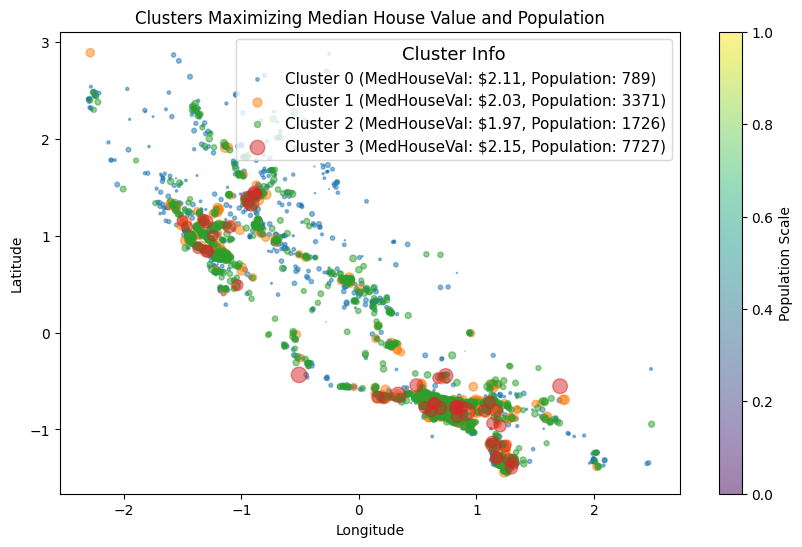

In [138]:
# Take a look at Median house value and population cluster using silhouette score to estimate and verify our hypothesis above
features_to_scale = df.columns.difference(['MedHouseVal', 'Population'])
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Focus on MedHouseVal and Population along with Latitude and Longitude for geographical clustering
features = ["MedHouseVal", "Population", "Latitude", "Longitude"]
X = df_scaled[features]

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Use K-Means to find clusters in the data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train)

# Predict clusters for the testing data
labels = kmeans.predict(X_test)

# Calculate silhouette score to evaluate the cluster
silhouette_avg = silhouette_score(X_test, labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Add cluster labels
X_test['Cluster'] = labels

# Calculate average values for MedHouseVal and Population for each cluster in the testing data
cluster_avg_values = X_test.groupby('Cluster')[['MedHouseVal', 'Population']].mean()

# Plot clusters with Median House Value and Population
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = X_test[X_test['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'],
                label=f'Cluster {cluster} (MedHouseVal: ${cluster_avg_values.loc[cluster, "MedHouseVal"]:.2f}, Population: {cluster_avg_values.loc[cluster, "Population"]:.0f})',
                s=cluster_data['Population']/100, alpha=0.5)
# Plot with important information on that
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters Maximizing Median House Value and Population')
plt.legend(title='Cluster Info', title_fontsize='13', fontsize='11', loc='upper right')
plt.colorbar(label='Population Scale')
plt.show()
